In [127]:
#Imports all necessary libraries
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from pandas.core.common import random_state
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel
import collections
import seaborn as sns
import matplotlib.pyplot as plt


from collinearity import SelectNonCollinear
import matplotlib.pyplot as plt

In [128]:
#Install the package for the collineratity of features
#!pip install collinearity

# First step: read the radiomics features database

![](slides/slide_ante.png)


In [129]:
#read Database
Database=pd.read_csv("Features.csv")
Database.head(len(Database))
print(Database.columns)


Index(['Elongation', 'Flatness', 'LeastAxisLength', 'MajorAxisLength',
       'Maximum2DDiameterColumn', 'Maximum2DDiameterRow',
       'Maximum2DDiameterSlice', 'Maximum3DDiameter', 'MeshVolume',
       'MinorAxisLength',
       ...
       'GrayLevelVariance_T2.2', 'HighGrayLevelEmphasis_T2',
       'LargeDependenceEmphasis_T2', 'LargeDependenceHighGrayLevelEmphasis_T2',
       'LargeDependenceLowGrayLevelEmphasis_T2', 'LowGrayLevelEmphasis_T2',
       'SmallDependenceEmphasis_T2', 'SmallDependenceHighGrayLevelEmphasis_T2',
       'SmallDependenceLowGrayLevelEmphasis_T2', 'OS1year'],
      dtype='object', length=187)


In [130]:
X_original = Database.loc[:, Database.columns != 'OS1year'] #features dataframe
y = Database.loc[:, Database.columns == 'OS1year'] #label dataframe

In [131]:
X_original.head() 

,Elongation,Flatness,LeastAxisLength,MajorAxisLength,Maximum2DDiameterColumn,Maximum2DDiameterRow,Maximum2DDiameterSlice,Maximum3DDiameter,MeshVolume,MinorAxisLength,...,GrayLevelNonUniformity_T2.2,GrayLevelVariance_T2.2,HighGrayLevelEmphasis_T2,LargeDependenceEmphasis_T2,LargeDependenceHighGrayLevelEmphasis_T2,LargeDependenceLowGrayLevelEmphasis_T2,LowGrayLevelEmphasis_T2,SmallDependenceEmphasis_T2,SmallDependenceHighGrayLevelEmphasis_T2,SmallDependenceLowGrayLevelEmphasis_T2
0,0.814252,0.670978,11.202859,16.696325,19.209373,19.416488,19.313208,21.470911,1107.666667,13.595016,...,1035.591350,0.042987,3.864960,372.099735,1485.345984,93.788173,0.283760,0.010263,0.025349,0.006492
1,0.529902,0.425208,34.515314,81.172868,74.431176,50.635956,74.672619,76.974022,55589.583330,43.013642,...,53988.857830,0.015560,3.952569,627.930747,2505.694076,158.489914,0.261858,0.002606,0.008259,0.001192
2,0.535417,0.330716,20.970225,63.408647,47.010637,40.224371,58.051701,60.712437,9835.833333,33.950039,...,6706.444175,0.161496,1.607511,446.079750,571.513426,414.721331,0.848122,0.006348,0.016990,0.003687
3,0.651269,0.466145,42.438068,91.040561,93.005376,107.935166,87.235314,109.256579,48064.125000,59.291856,...,34509.416590,0.141058,3.490192,489.970481,1819.313037,157.634842,0.377452,0.004368,0.011471,0.002593
4,0.419819,0.263838,6.304352,23.894813,15.811388,13.892444,20.000000,22.405356,410.000000,10.031490,...,233.254546,0.234938,2.868182,185.345454,534.750000,97.994318,0.532955,0.019571,0.050318,0.011884


In [132]:
y.head()

,OS1year
0,1
1,1
2,0
3,0
4,1


In [133]:
print(y.value_counts()) #Class (im)balance plot

OS1year
1          30
0          26
Name: count, dtype: int64


## REMOVE THE COLLINEARITY Radiomics Features
### Collinear features in radiomics datasets can introduce redundancy and negatively impact model performance

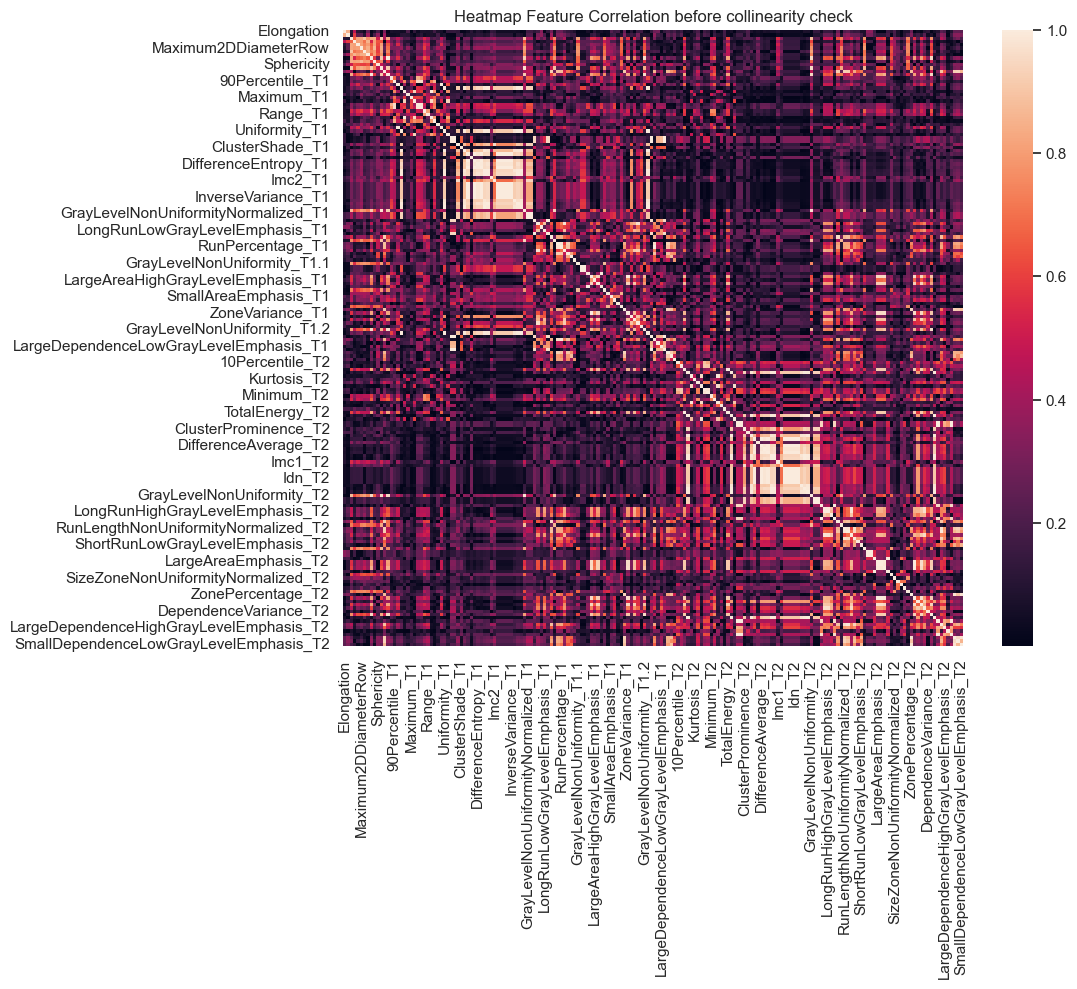

In [134]:
#Compute corr. matrix (btw features)
correlation_matrix = X_original.corr() 

# Create the heatmap 
plt.figure(figsize=(10, 8))  
sns.set_theme(rc={'figure.figsize':(15,12)})

#Collinearity is considered in absolute value because it affects the strength of the linear relationship between two variables, regardless of the sign of the correlation
sns.heatmap(X_original.corr().abs(),annot=False)  
# Show heatmap
plt.title('Heatmap Feature Correlation before collinearity check')
plt.show()

How many features do we keep?  64
Index(['Elongation', 'LeastAxisLength', 'MajorAxisLength', 'Sphericity',
       'SurfaceVolumeRatio', '10Percentile_T1', '90Percentile_T1', 'Energy_T1',
       'Entropy_T1', 'InterquartileRange_T1', 'Kurtosis_T1', 'Maximum_T1',
       'Minimum_T1', 'Skewness_T1', 'Variance_T1', 'Autocorrelation_T1',
       'ClusterShade_T1', 'Correlation_T1', 'Imc1_T1', 'LongRunEmphasis_T1',
       'LongRunHighGrayLevelEmphasis_T1', 'RunLengthNonUniformity_T1',
       'ShortRunEmphasis_T1', 'ShortRunLowGrayLevelEmphasis_T1',
       'GrayLevelNonUniformityNormalized_T1.1', 'HighGrayLevelZoneEmphasis_T1',
       'LargeAreaEmphasis_T1', 'LargeAreaHighGrayLevelEmphasis_T1',
       'SizeZoneNonUniformity_T1', 'SizeZoneNonUniformityNormalized_T1',
       'SmallAreaEmphasis_T1', 'SmallAreaHighGrayLevelEmphasis_T1',
       'SmallAreaLowGrayLevelEmphasis_T1', 'DependenceVariance_T1',
       'SmallDependenceHighGrayLevelEmphasis_T1',
       'SmallDependenceLowGrayLevelEmphasis_T

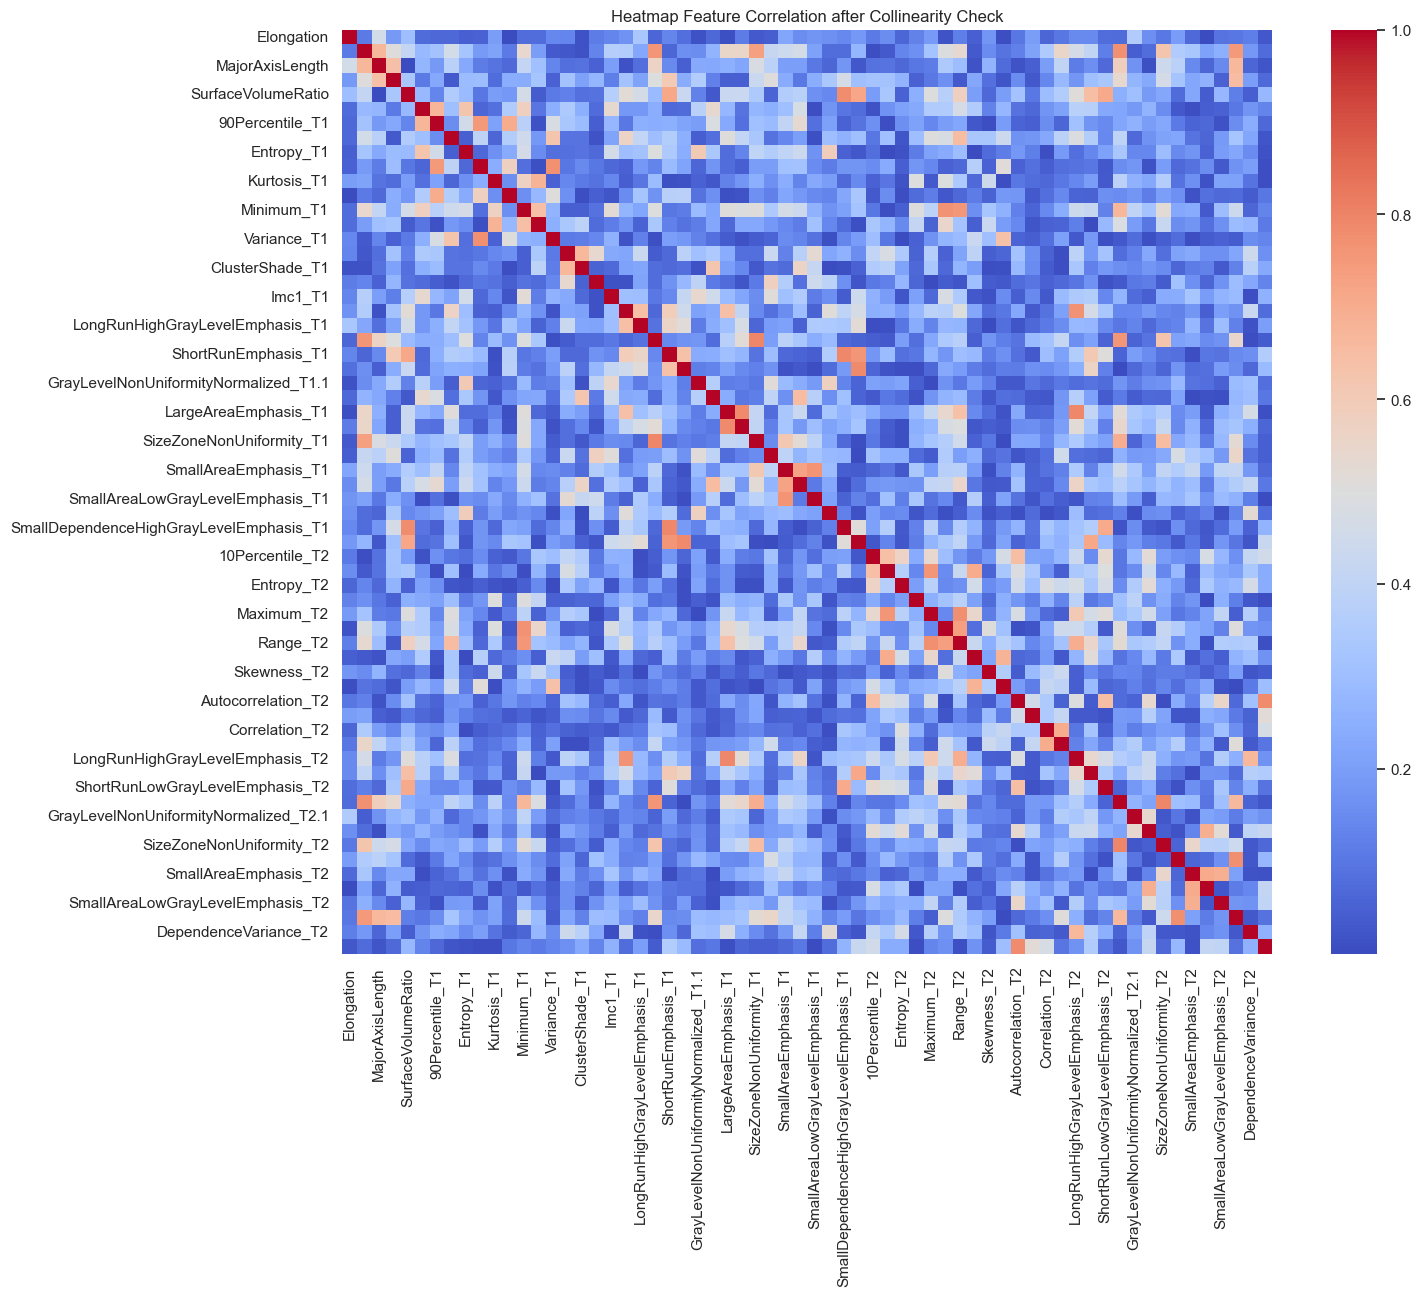

In [135]:
selector = SelectNonCollinear(0.8)

# Define names as the column names of X_original
names = X_original.columns  # Save column names from the original DataFrame

# Convert X_original to a NumPy array (this conversion is necessary for the method fit)
X_original_ = X_original.values

# Select features with SelectNonCollinear (assuming you have implemented or imported it)
selector = SelectNonCollinear(0.8)
selector.fit(X_original_)

# Get the mask of selected features
mask = selector.get_support()
print("How many features do we keep? ", np.sum(mask))

# Create a new DataFrame with selected features
X = pd.DataFrame(X_original_[:, mask], columns=np.array(names)[mask])

# Update the names variable with the new DataFrame's column names
names = X.columns
print(names)

# Visualize the correlation heatmap
sns.set_theme(rc={'figure.figsize': (15, 12)})
sns.heatmap(X.corr().abs(), annot=False, cmap="coolwarm")

plt.title('Heatmap Feature Correlation after Collinearity Check')
plt.show()


In [136]:
#dafaframe head after features selection (note that it has 64 columns)
X.head()

,Elongation,LeastAxisLength,MajorAxisLength,Sphericity,SurfaceVolumeRatio,10Percentile_T1,90Percentile_T1,Energy_T1,Entropy_T1,InterquartileRange_T1,...,GrayLevelNonUniformityNormalized_T2.1,HighGrayLevelZoneEmphasis_T2,SizeZoneNonUniformity_T2,SizeZoneNonUniformityNormalized_T2,SmallAreaEmphasis_T2,SmallAreaHighGrayLevelEmphasis_T2,SmallAreaLowGrayLevelEmphasis_T2,ZoneEntropy_T2,DependenceVariance_T2,LargeDependenceLowGrayLevelEmphasis_T2
0,0.814252,11.202859,16.696325,0.484071,0.965545,-0.288682,0.259610,57.467931,0.896351,0.266343,...,0.820000,1.300000,1.400000,0.140000,0.257106,0.257107,0.257106,2.921928,42.387220,93.788173
1,0.529902,34.515314,81.172868,0.526562,0.240641,-1.001990,0.241659,35325.662750,0.611447,0.503127,...,0.961553,1.058824,6.529412,0.128028,0.334015,0.334015,0.334015,3.622969,19.500172,158.489914
2,0.535417,20.970225,63.408647,0.492633,0.458167,0.354418,1.457430,10762.955800,0.327645,0.499841,...,0.689349,3.423077,2.846154,0.109467,0.286647,1.002356,0.107719,3.888155,43.321123,414.721331
3,0.651269,42.438068,91.040561,0.277512,0.479286,-0.739033,0.835584,37322.142960,0.902682,0.685054,...,0.850986,1.243243,6.432432,0.086925,0.274838,0.315493,0.264675,4.480073,36.901753,157.634842
4,0.419819,6.304352,23.894813,0.472483,1.377749,0.366441,1.188136,339.551829,0.142700,0.412362,...,0.504132,2.363636,1.363636,0.123967,0.139730,0.209651,0.122250,3.277613,29.095455,97.994318


# Example 1
### Feature Selection method: SelectNonCollinear
### Five CLassifier


![](slides/slide_1.png)

In [137]:
# Split Dataset in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=5454)

# feature normalisation 

#fit_transform: Calculates the parameters and normalises the data.
#transform: Applies normalisation using the calculated parameters on the training set.

#If fit_transform were used on the test set, new parameters (e.g. a new minimum and maximum) 
# specific to the test set would be recalculated, breaking the consistency between the two sets --> This would introduce a bias, making the results of the model unreliable.
#Note: 

sc = MinMaxScaler()    ### Xscaled=X-Xmin/Xmax-Xmin
x_train = sc.fit_transform(X_train) 
x_test = sc.transform(X_test)
x_train = pd.DataFrame(x_train, columns=X.columns)
x_test = pd.DataFrame(x_test, columns=X.columns)




### Note when is it important to normalising the features?

Some machine learning models (e.g. SVM, k-NN, logistic regression, neural networks) are sensitive to feature scale.
If one variable has a wider range (e.g. 0 to 10,000) than another (e.g. 0 to 1), the model will tend to give more importance to the former, regardless of its actual relevance.

Classifiers:

It should be emphasised that each classifier has its own hyper-parameters which should be “optimised” and for this there should be a validation set, but we will not see the process of optimising the hyper-parameters.


In [138]:

modelETC = ExtraTreesClassifier(n_estimators=64,max_depth=10, criterion="gini", n_jobs=-1, random_state=100)
modelSVM = svm.SVC(kernel='rbf', C= 10, gamma=0.01, random_state=1000)
modelLR=LogisticRegression(solver='liblinear', C=1, random_state=100)
modelRF = RandomForestClassifier(n_estimators=64, max_depth=10,  criterion="gini",random_state=100)

modelETC.fit(x_train, y_train)
modelLR.fit(x_train, y_train)
modelSVM.fit(x_train, y_train)
modelRF.fit(x_train, y_train)

y_predETC = modelETC.predict(x_test)
y_predLR= modelLR.predict(x_test)
y_predSVM= modelSVM.predict(x_test)
y_predRF= modelRF.predict(x_test)


F1_ETC=f1_score(y_test, y_predETC)
F1_LR=f1_score(y_test, y_predLR)
F1_SVM=f1_score(y_test, y_predSVM)
F1_RF=f1_score(y_test, y_predRF)

/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector 

In [139]:
#alising the features?

#Some machine learning models (e.g. SVM, k-NN, logistic regression, neural networks) are sensitive to feature scale.
#If one variable has a wider range (e.g. 0 to 10,000) than another (e.g. 0 to 1), the model will tend to give more importance to the former, regardless of its actual relevance.

#Classifiers 
#It should be emphasised that each classifier has its own hyper-parameters which should be “optimised” and for this there should be a validation set, but we will not see the process of optimising the hyper-parameters.

modelETC = ExtraTreesClassifier(n_estimators=64,max_depth=10, criterion="gini", n_jobs=-1, random_state=100)
modelSVM = svm.SVC(kernel='rbf', C= 10, gamma=0.01, random_state=1000)
modelLR=LogisticRegression(solver='liblinear', C=1, random_state=100)
modelRF = RandomForestClassifier(n_estimators=64, max_depth=10,  criterion="gini",random_state=100)

modelETC.fit(x_train, y_train)
modelLR.fit(x_train, y_train)
modelSVM.fit(x_train, y_train)
modelRF.fit(x_train, y_train)

y_predETC = modelETC.predict(x_test)
y_predLR= modelLR.predict(x_test)
y_predSVM= modelSVM.predict(x_test)
y_predRF= modelRF.predict(x_test)


F1_ETC=f1_score(y_test, y_predETC)
F1_LR=f1_score(y_test, y_predLR)
F1_SVM=f1_score(y_test, y_predSVM)
F1_RF=f1_score(y_test, y_predRF)

/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector 

 ### Der F1-Score ist eine Metrik zur Bewertung der Leistung eines Klassifikationsmodells. Er ist das harmonische Mittel aus Präzision (Precision) und Trefferquote (Recall) und wird verwendet, um ein Gleichgewicht zwischen diesen beiden Metriken herzustellen

In [140]:
print('F1_SCORE ETC: %.3f ' % (F1_ETC))
print('F1_SCORE LR: %.3f' % (F1_LR))
print('F1_SCORE SVM: %.3f' % (F1_SVM))
print('F1_SCORE RF: %.3f' % (F1_RF))

F1_SCORE ETC: 0.842 
F1_SCORE LR: 0.889
F1_SCORE SVM: 0.889
F1_SCORE RF: 0.842


In [141]:
#Sample of classification_report for the ETC.. It gives me an idea of the performance of the single classes? Which is the problem of aggregated metrics like Accuracy?
print(classification_report(y_test, y_predETC))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.80      0.89      0.84         9

    accuracy                           0.82        17
   macro avg       0.83      0.82      0.82        17
weighted avg       0.83      0.82      0.82        17



# Example 2:
### Feature Selection method: Recursive Feature Elimination (RFE)
### Two CLassifiers

RFE works by recursively removing features based on the importance assigned to coefficients in the model. 

[1] RFE starts by training the specified model (LogisticRegression in your case) on the entire feature set.

[2] After training, the model assigns a weight (or coefficient) to each feature, which indicates the importance of that feature in realising the prediction. [For linear models such as logistic regression, a higher coefficient (in absolute value) indicates greater importance.]

[3] Features are sorted according to importance (from least to most important). RFE eliminates the least important features according to the step parameter, which defines how many features to remove in each iteration of the process.

[4] The model is retrained with the remaining features and the elimination process is repeated. This cycle continues until only the desired number of features remain in the model (n_features_to_select).

![](slides/slide_2.png)

In [142]:
#feature selection method: Recursive Feature Elimination

Feature_RFE=[]
model=LogisticRegression(solver="liblinear", random_state=1000)
rfe_selector = RFE(model,n_features_to_select=15,  step=10)   #n_features_to_select=15 aka number of features to keep at the end, step=10 is the number of feature to discard at every iteration.
rfe_selector.fit(x_train, y_train)
rfe_support = rfe_selector.get_support()


# Collecting the names of selected features
Feature_RFE = [feature for is_selected, feature in zip(rfe_support, x_train.columns) if is_selected]

# Output the names of selected features
print("Selected features:", Feature_RFE)
print("Number of selected features:", len(Feature_RFE))

# New dataframe with feature selection
x_train_selectedRFE=x_train[Feature_RFE]
x_test_selectedRFE=x_test[Feature_RFE]

Selected features: ['Elongation', 'Energy_T1', 'Kurtosis_T1', 'Autocorrelation_T1', 'ClusterShade_T1', 'RunLengthNonUniformity_T1', 'SmallAreaLowGrayLevelEmphasis_T1', 'DependenceVariance_T1', 'Maximum_T2', 'Skewness_T2', 'Autocorrelation_T2', 'Correlation_T2', 'ShortRunHighGrayLevelEmphasis_T2', 'GrayLevelNonUniformityNormalized_T2.1', 'LargeDependenceLowGrayLevelEmphasis_T2']
Number of selected features: 15


/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A colu

In [143]:
# Classifiers
modelETC = ExtraTreesClassifier(n_estimators=16,max_depth=5, min_samples_split=4, min_samples_leaf=2, criterion="gini", n_jobs=-1, random_state=100)
modelRF = RandomForestClassifier(n_estimators=16, max_depth=5, min_samples_split=4, min_samples_leaf=2, criterion="gini",random_state=100)

modelETC.fit(x_train_selectedRFE, y_train)
modelRF.fit(x_train_selectedRFE, y_train)

y_predETC = modelETC.predict(x_test_selectedRFE)
y_predRF= modelRF.predict(x_test_selectedRFE)

# Classification Performance
F1_ETC=f1_score(y_test, y_predETC)
F1_RF=f1_score(y_test, y_predRF)

# Print Performance
print('F1_SCORE ETC: %.3f ' % (F1_ETC))
print('F1_SCORE RF: %.3f' % (F1_RF))

F1_SCORE ETC: 0.889 
F1_SCORE RF: 0.625


/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [144]:
print(classification_report(y_test, y_predETC))
print(classification_report(y_test, y_predRF))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.89      0.89      0.89         9

    accuracy                           0.88        17
   macro avg       0.88      0.88      0.88        17
weighted avg       0.88      0.88      0.88        17

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.71      0.56      0.62         9

    accuracy                           0.65        17
   macro avg       0.66      0.65      0.65        17
weighted avg       0.66      0.65      0.64        17



## Check features importance for ETC and RF classifiers

In [145]:
#Extraction of the  most important features

importances_ETC = modelETC.feature_importances_
importances_RF = modelRF.feature_importances_

features = x_train_selectedRFE.columns

importances = pd.DataFrame({
    'Feature': features,
    'Importance_ETC': importances_ETC,
    'Importance_RF': importances_RF
})


print(importances)

                                   Feature  Importance_ETC  Importance_RF
0                               Elongation        0.033581       0.029529
1                                Energy_T1        0.034985       0.096779
2                              Kurtosis_T1        0.039255       0.021205
3                       Autocorrelation_T1        0.119943       0.074886
4                          ClusterShade_T1        0.168365       0.116921
5                RunLengthNonUniformity_T1        0.059054       0.011984
6         SmallAreaLowGrayLevelEmphasis_T1        0.027831       0.031560
7                    DependenceVariance_T1        0.016493       0.034382
8                               Maximum_T2        0.084599       0.021206
9                              Skewness_T2        0.027743       0.171398
10                      Autocorrelation_T2        0.150392       0.080031
11                          Correlation_T2        0.033885       0.076433
12        ShortRunHighGrayLevelEmphasi

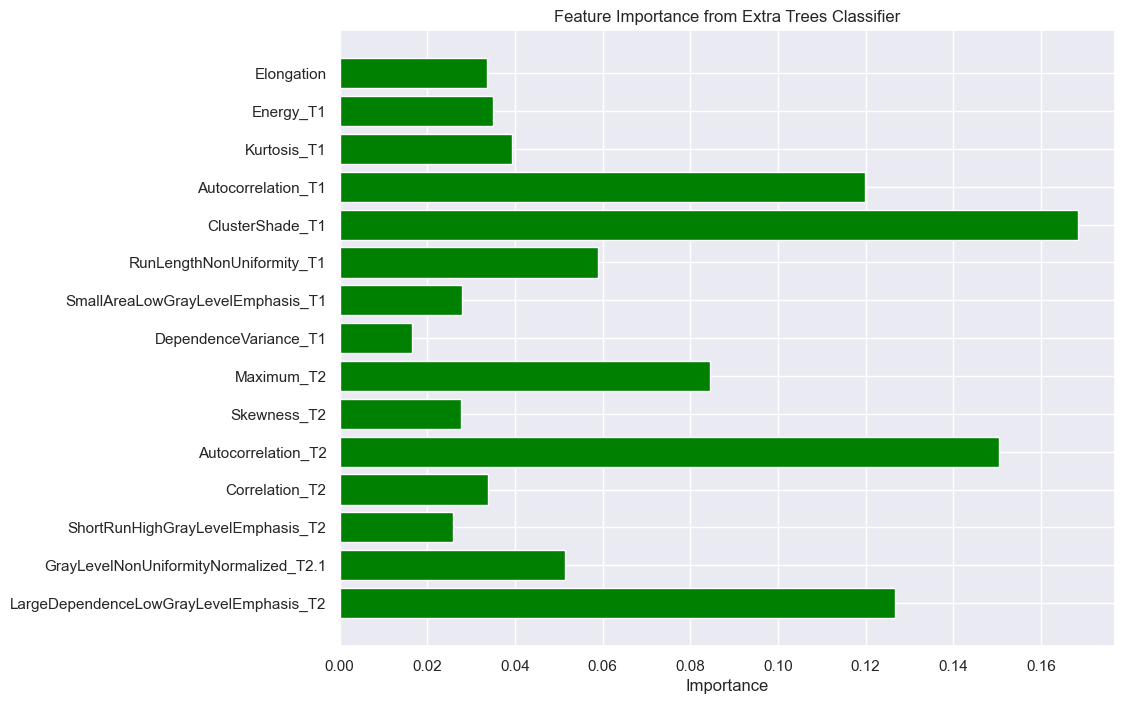

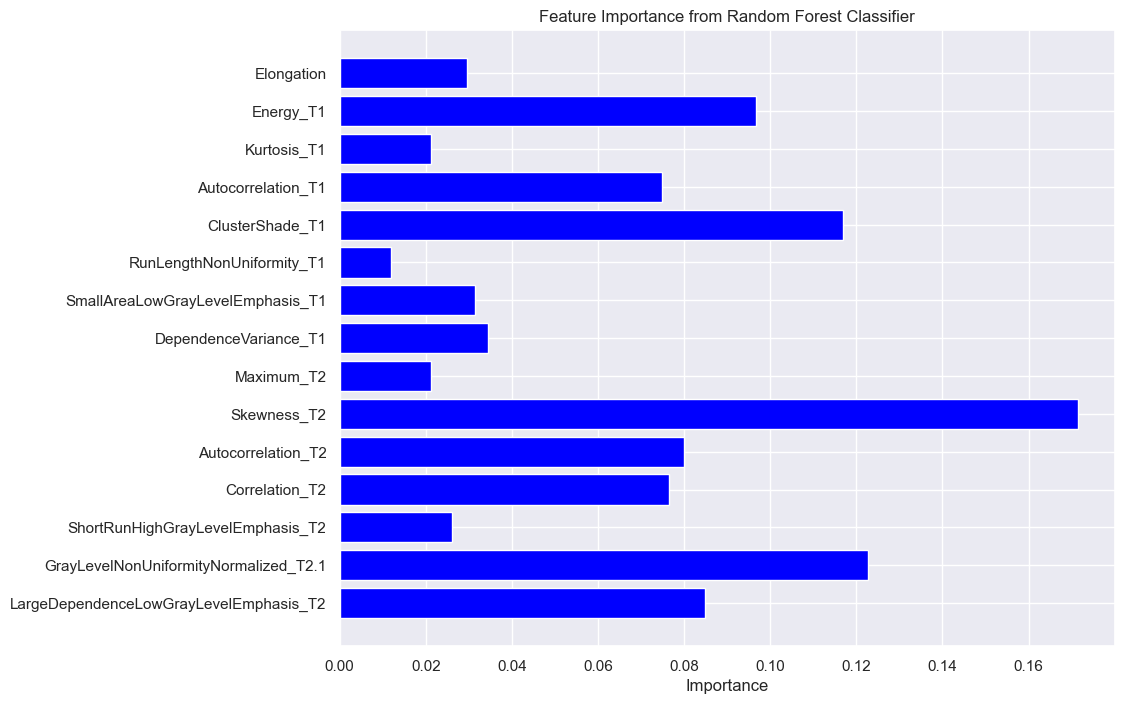

In [146]:
# Plotting Extra Trees Classifier Feature Importances
plt.figure(figsize=(10, 8))
plt.barh(features, importances_ETC, color='green')
plt.xlabel('Importance')
plt.title('Feature Importance from Extra Trees Classifier')
plt.gca().invert_yaxis()  # Invert the y-axis to have the most important at the top
plt.show()

# Plotting Random Forest Classifier Feature Importances
plt.figure(figsize=(10, 8))
plt.barh(features, importances_RF, color='blue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest Classifier')
plt.gca().invert_yaxis()  # Invert the y-axis to have the most important at the top
plt.show()

# Example 3:
### Feature Selection method: Select k best (chi2), Recursive Feature Elimination (RFE), Select From Model (with Logistic Regression) and Select From Model (with Random Forest)

In [147]:
#Create empty vectors where selected feature sets can be inserted
Feature_kbest=[]
Feature_RFE=[]
Feature_LR=[]
Feature_RF=[]

featurenew=list()

#Number of features selected for each method
num_feats=20

#SelectKbest
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(x_train, y_train)
chi_support = chi_selector.get_support()
Feature_kbest = [feature for is_selected, feature in zip(chi_support, x_train.columns) if is_selected]

#rfe
model=LogisticRegression(solver="liblinear", random_state=345)
rfe_selector = RFE(model,n_features_to_select=num_feats,  step=10, verbose=5)
rfe_selector.fit(x_train, y_train)
rfe_support = rfe_selector.get_support()
Feature_RFE = [feature for is_selected, feature in zip(rfe_support, x_train.columns) if is_selected]

#Select From Model (Logistic Regression)
embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2", random_state=345), max_features=num_feats)
embeded_lr_selector.fit(x_train, y_train)
embeded_lr_support = embeded_lr_selector.get_support()
Feature_LR = [feature for is_selected, feature in zip(embeded_lr_support, x_train.columns) if is_selected]

#Select From Model (Random Forest)
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=345), max_features=num_feats)
embeded_rf_selector.fit(x_train, y_train)
embeded_rf_support = embeded_rf_selector.get_support()
Feature_RF = [feature for is_selected, feature in zip(embeded_rf_support, x_train.columns) if is_selected]

Fitting estimator with 64 features.
Fitting estimator with 54 features.
Fitting estimator with 44 features.
Fitting estimator with 34 features.
Fitting estimator with 24 features.


/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A colu

In [148]:
print(len(Feature_kbest))
print(len(Feature_RFE))
print(len(Feature_LR))
print(len(Feature_RF))

20
20
20
20


In [149]:
#Voting Procedure
all_features=(Feature_kbest+Feature_RFE+Feature_LR+Feature_RF)

# Count occurrences of each feature
feature_votes = collections.Counter(all_features)
print("Feature vote counts:", feature_votes)

Feature vote counts: Counter({'Autocorrelation_T1': 4, 'ClusterShade_T1': 4, 'RunLengthNonUniformity_T1': 4, 'SmallAreaLowGrayLevelEmphasis_T1': 4, 'Maximum_T2': 4, 'Autocorrelation_T2': 4, 'LargeDependenceLowGrayLevelEmphasis_T2': 4, 'Energy_T1': 3, 'Kurtosis_T1': 3, 'SmallDependenceLowGrayLevelEmphasis_T1': 3, 'GrayLevelNonUniformityNormalized_T2.1': 3, 'DependenceVariance_T2': 3, 'DependenceVariance_T1': 3, 'Range_T2': 3, 'Skewness_T2': 3, 'Correlation_T2': 3, '90Percentile_T2': 2, 'LongRunHighGrayLevelEmphasis_T2': 2, 'Elongation': 2, 'Skewness_T1': 2, 'SizeZoneNonUniformity_T1': 2, 'SurfaceVolumeRatio': 1, 'ShortRunLowGrayLevelEmphasis_T1': 1, 'LargeAreaHighGrayLevelEmphasis_T1': 1, 'ClusterShade_T2': 1, 'GrayLevelNonUniformity_T2.1': 1, 'SmallAreaHighGrayLevelEmphasis_T2': 1, 'LeastAxisLength': 1, 'ShortRunHighGrayLevelEmphasis_T2': 1, 'Kurtosis_T2': 1, 'InterquartileRange_T1': 1, 'Minimum_T1': 1, 'Correlation_T1': 1, 'LongRunEmphasis_T1': 1, 'HighGrayLevelZoneEmphasis_T1': 1, 'S

In [150]:
sorted_votes = sorted(feature_votes.items(), key=lambda x: x[1], reverse=True)
print("Feature vote counts (ordered):")
for feature, count in sorted_votes:
    print(f"{feature}: {count}")

Feature vote counts (ordered):
Autocorrelation_T1: 4
ClusterShade_T1: 4
RunLengthNonUniformity_T1: 4
SmallAreaLowGrayLevelEmphasis_T1: 4
Maximum_T2: 4
Autocorrelation_T2: 4
LargeDependenceLowGrayLevelEmphasis_T2: 4
Energy_T1: 3
Kurtosis_T1: 3
SmallDependenceLowGrayLevelEmphasis_T1: 3
GrayLevelNonUniformityNormalized_T2.1: 3
DependenceVariance_T2: 3
DependenceVariance_T1: 3
Range_T2: 3
Skewness_T2: 3
Correlation_T2: 3
90Percentile_T2: 2
LongRunHighGrayLevelEmphasis_T2: 2
Elongation: 2
Skewness_T1: 2
SizeZoneNonUniformity_T1: 2
SurfaceVolumeRatio: 1
ShortRunLowGrayLevelEmphasis_T1: 1
LargeAreaHighGrayLevelEmphasis_T1: 1
ClusterShade_T2: 1
GrayLevelNonUniformity_T2.1: 1
SmallAreaHighGrayLevelEmphasis_T2: 1
LeastAxisLength: 1
ShortRunHighGrayLevelEmphasis_T2: 1
Kurtosis_T2: 1
InterquartileRange_T1: 1
Minimum_T1: 1
Correlation_T1: 1
LongRunEmphasis_T1: 1
HighGrayLevelZoneEmphasis_T1: 1
ShortRunLowGrayLevelEmphasis_T2: 1


In [151]:
# Select features that appear in at least 3 out of 4 methods
voting_threshold = 3
selected_features = [feature for feature, count in feature_votes.items() if count >= voting_threshold]

print("Final Selected Features (after voting):", selected_features)
print(len(selected_features))

Final Selected Features (after voting): ['Energy_T1', 'Kurtosis_T1', 'Autocorrelation_T1', 'ClusterShade_T1', 'RunLengthNonUniformity_T1', 'SmallAreaLowGrayLevelEmphasis_T1', 'SmallDependenceLowGrayLevelEmphasis_T1', 'Maximum_T2', 'Autocorrelation_T2', 'GrayLevelNonUniformityNormalized_T2.1', 'DependenceVariance_T2', 'LargeDependenceLowGrayLevelEmphasis_T2', 'DependenceVariance_T1', 'Range_T2', 'Skewness_T2', 'Correlation_T2']
16


In [152]:
#create new Dataset with this features
x_trainVoting=x_train[selected_features]
x_testVoting=x_test[selected_features]

#Classifiers
modelETC = ExtraTreesClassifier(n_estimators=300,max_depth=10, criterion="gini", n_jobs=-1, random_state=100)
modelSVM = svm.SVC(kernel='rbf', C= 10, gamma=0.01, random_state=1000)
modelLR=LogisticRegression(solver='liblinear', C=1, random_state=100)
modelRF = RandomForestClassifier(n_estimators=300, max_depth=10,  criterion="gini",random_state=100)
modelKN= KNeighborsClassifier(n_neighbors=10,p=2, metric= 'manhattan', weights='uniform')
modelETC.fit(x_trainVoting, y_train)
modelLR.fit(x_trainVoting, y_train)
modelSVM.fit(x_trainVoting, y_train)
modelRF.fit(x_trainVoting, y_train)


y_predETC = modelETC.predict(x_testVoting)
y_predLR= modelLR.predict(x_testVoting)
y_predSVM= modelSVM.predict(x_testVoting)
y_predRF= modelRF.predict(x_testVoting)


F1_ETC=f1_score(y_test, y_predETC)
F1_LR=f1_score(y_test, y_predLR)
F1_SVM=f1_score(y_test, y_predSVM)
F1_RF=f1_score(y_test, y_predRF)


/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector 

In [153]:
print('F1_SCORE ETC: %.3f ' % (F1_ETC))
print('F1_SCORE LR: %.3f' % (F1_LR))
print('F1_SCORE SVM: %.3f' % (F1_SVM))
print('F1_SCORE RF: %.3f' % (F1_RF))

F1_SCORE ETC: 0.800 
F1_SCORE LR: 0.824
F1_SCORE SVM: 0.824
F1_SCORE RF: 0.875


# Example 4: 5 fold Cross Validation

In [ ]:
# Create a list of vector for each classifiers
F1_scoreETC=list()
F1_scoreLR=list()
F1_scoreSVM=list()
F1_scoreRF=list()
F1_scoreKN=list()

#5 Fold cross validation
cv =StratifiedKFold(n_splits=5, shuffle=True, random_state=54)
for train_ix, test_ix in cv.split(X, y):
  X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
  y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]

  #features normalization
  sc = MinMaxScaler()
  x_train = sc.fit_transform(X_train)
  x_test = sc.transform(X_test)
  x_train = pd.DataFrame(x_train, columns=X.columns)
  x_test = pd.DataFrame(x_test, columns=X.columns)

  Feature_kbest=[]
  Feature_RFE=[]
  Feature_LR=[]
  Feature_RF=[]
  featurenew=list()
  num_feats=20

  #select k best
  chi_selector = SelectKBest(chi2, k=num_feats)
  chi_selector.fit(x_train, y_train)
  chi_support = chi_selector.get_support()
  Feature_kbest = [feature for is_selected, feature in zip(chi_support, x_train.columns) if is_selected]
  print("Feature_kbest", Feature_kbest)
 

  #rfe (random feature extractor)
  model=LogisticRegression(solver="liblinear", random_state=345)
  rfe_selector = RFE(model,n_features_to_select=num_feats,  step=10, verbose=5)
  rfe_selector.fit(x_train, y_train)
  rfe_support = rfe_selector.get_support()
  Feature_RFE = [feature for is_selected, feature in zip(rfe_support, x_train.columns) if is_selected]
  print("Feature_RFE", Feature_RFE)

  #Select from model (Logistic Regression)
  embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2", random_state=345), max_features=num_feats)
  embeded_lr_selector.fit(x_train, y_train)
  embeded_lr_support = embeded_lr_selector.get_support()
  Feature_LR = [feature for is_selected, feature in zip(embeded_lr_support, x_train.columns) if is_selected]
  print("Feature_LR", Feature_LR)

  #Select From Model(TReebased)
  embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=345), max_features=num_feats)
  embeded_rf_selector.fit(x_train, y_train)
  embeded_rf_support = embeded_rf_selector.get_support()
  Feature_RF = [feature for is_selected, feature in zip(embeded_rf_support, x_train.columns) if is_selected]
  print("Feature_RF", Feature_RF)

  #Voting Procedure
  all_features=(Feature_kbest+Feature_RFE+Feature_LR+Feature_RF)
  voting_threshold = 3
  selected_features_CV = [feature for feature, count in feature_votes.items() if count >= voting_threshold]

  x_train_selectedCV=x_train[selected_features_CV]
  x_test_selectedCV=x_test[selected_features_CV]

  #Classifiers
  modelETC = ExtraTreesClassifier(n_estimators=24,max_depth=8, criterion="gini", n_jobs=-1, random_state=100)
  modelSVM = svm.SVC(kernel='rbf', C= 10, gamma=0.01, random_state=1000)
  modelLR=LogisticRegression(solver='liblinear', C=1, random_state=100)
  modelRF = RandomForestClassifier(n_estimators=24, max_depth=8,  criterion="gini",random_state=100)
  modelETC.fit(x_train_selectedCV, y_train)
  modelLR.fit(x_train_selectedCV, y_train)
  modelSVM.fit(x_train_selectedCV, y_train)
  modelRF.fit(x_train_selectedCV, y_train)

  y_predETC = modelETC.predict(x_test_selectedCV)
  y_predLR= modelLR.predict(x_test_selectedCV)
  y_predSVM= modelSVM.predict(x_test_selectedCV)
  y_predRF= modelRF.predict(x_test_selectedCV)


  F1_ETC=f1_score(y_test, y_predETC)
  F1_LR=f1_score(y_test, y_predLR)
  F1_SVM=f1_score(y_test, y_predSVM)
  F1_RF=f1_score(y_test, y_predRF)
 


  F1_scoreETC.append(F1_ETC)
  F1_scoreLR.append(F1_LR)
  F1_scoreSVM.append(F1_SVM)
  F1_scoreRF.append(F1_RF)


/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A colu

Feature_kbest ['MajorAxisLength', 'Energy_T1', 'InterquartileRange_T1', 'Kurtosis_T1', 'Autocorrelation_T1', 'ClusterShade_T1', 'LongRunEmphasis_T1', 'RunLengthNonUniformity_T1', 'HighGrayLevelZoneEmphasis_T1', 'SizeZoneNonUniformity_T1', 'SmallAreaLowGrayLevelEmphasis_T1', '90Percentile_T2', 'Maximum_T2', 'Autocorrelation_T2', 'ClusterShade_T2', 'LongRunHighGrayLevelEmphasis_T2', 'GrayLevelNonUniformity_T2.1', 'SizeZoneNonUniformity_T2', 'SmallAreaHighGrayLevelEmphasis_T2', 'LargeDependenceLowGrayLevelEmphasis_T2']
Fitting estimator with 64 features.
Fitting estimator with 54 features.
Fitting estimator with 44 features.
Fitting estimator with 34 features.
Fitting estimator with 24 features.
Feature_RFE ['MajorAxisLength', 'Energy_T1', 'InterquartileRange_T1', 'Maximum_T1', 'Skewness_T1', 'Autocorrelation_T1', 'ClusterShade_T1', 'RunLengthNonUniformity_T1', 'GrayLevelNonUniformityNormalized_T1.1', 'HighGrayLevelZoneEmphasis_T1', 'SizeZoneNonUniformity_T1', 'SmallAreaLowGrayLevelEmphas

/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector 

Feature_RF ['Elongation', '10Percentile_T1', 'Kurtosis_T1', 'Maximum_T1', 'Minimum_T1', 'Autocorrelation_T1', 'ClusterShade_T1', 'LongRunEmphasis_T1', 'HighGrayLevelZoneEmphasis_T1', 'SizeZoneNonUniformity_T1', 'SmallAreaEmphasis_T1', 'SmallAreaLowGrayLevelEmphasis_T1', '90Percentile_T2', 'Maximum_T2', 'Minimum_T2', 'RootMeanSquared_T2', 'Correlation_T2', 'ShortRunHighGrayLevelEmphasis_T2', 'GrayLevelNonUniformity_T2.1', 'LargeDependenceLowGrayLevelEmphasis_T2']
Feature_kbest ['LeastAxisLength', 'Kurtosis_T1', 'Autocorrelation_T1', 'ClusterShade_T1', 'LongRunHighGrayLevelEmphasis_T1', 'RunLengthNonUniformity_T1', 'LargeAreaHighGrayLevelEmphasis_T1', 'SizeZoneNonUniformity_T1', '90Percentile_T2', 'Entropy_T2', 'Maximum_T2', 'RootMeanSquared_T2', 'Autocorrelation_T2', 'LongRunHighGrayLevelEmphasis_T2', 'ShortRunLowGrayLevelEmphasis_T2', 'GrayLevelNonUniformity_T2.1', 'SizeZoneNonUniformity_T2', 'SmallAreaHighGrayLevelEmphasis_T2', 'DependenceVariance_T2', 'LargeDependenceLowGrayLevelEmph

/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A colu

In [155]:
print('F1_SCORE ETC: %.3f (%.3f)' % (np.median(F1_scoreETC), std(F1_scoreETC)))
print('F1_SCORE LR: %.3f (%.3f)' % (np.median(F1_scoreLR), std(F1_scoreLR)))
print('F1_SCORE SVM: %.3f (%.3f)' % (np.median(F1_scoreSVM), std(F1_scoreSVM)))
print('F1_SCORE RF: %.3f (%.3f)' % (np.median(F1_scoreRF), std(F1_scoreRF)))

F1_SCORE ETC: 0.857 (0.099)
F1_SCORE LR: 0.800 (0.078)
F1_SCORE SVM: 0.800 (0.108)
F1_SCORE RF: 0.800 (0.113)


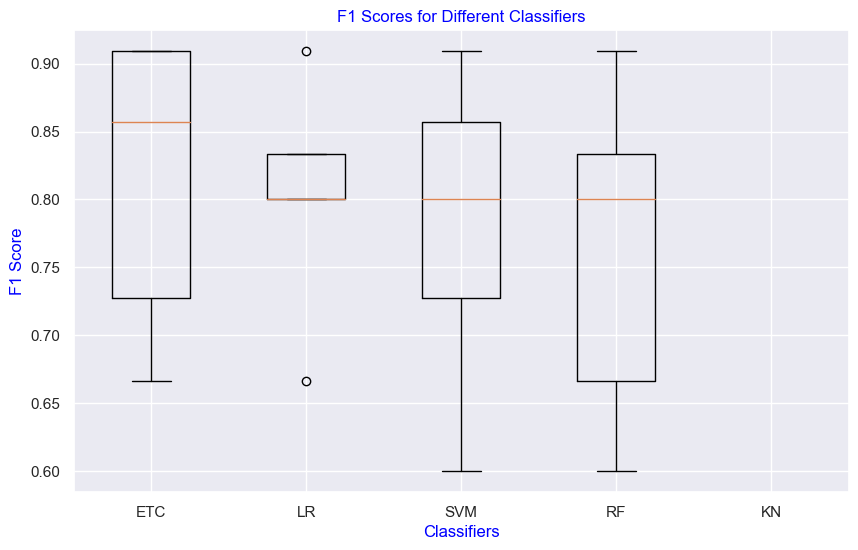

In [156]:
#Visualize Results
import matplotlib.pyplot as plt
import numpy as np

# Classifier names
classifiers = ['ETC', 'LR', 'SVM', 'RF', 'KN']

# Create boxplot using ax
fig, ax = plt.subplots(figsize=(10, 6))

# Boxplot
ax.boxplot([F1_scoreETC, F1_scoreLR, F1_scoreSVM, F1_scoreRF, F1_scoreKN], labels=classifiers)

# Titles and axis labels
ax.set_title('F1 Scores for Different Classifiers', color='blue')
ax.set_xlabel('Classifiers', color='blue')
ax.set_ylabel('F1 Score', color='blue')

# Show the plot
plt.show()